In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# coming out with the directories for adl and fall files for each person
adl_dir = []
fall_dir = []
dataset_path = 'C:\\Users\\yiting.wong\\Documents\\NUS\\MedTech\\publicFallDetector201307\\data201307'

for i in range(10):
    i_adl = '\\'.join([dataset_path, 'person'+str(i), 'adlProcessedVector', str(i)+'adlPV.dat'])
    i_fall = '\\'.join([dataset_path, 'person'+str(i), 'fallProcessedVector', str(i)+'fallPV.dat'])
    adl_dir.append(i_adl)
    fall_dir.append(i_fall)

## Preparing ADL Datasets

In [3]:
# preparing x, y and z dataset

df0 = pd.read_csv(adl_dir[0], sep=" ", header=None)
df0_x = df0.loc[::3].values.copy()
df0_y = df0.loc[1::3].values.copy()
df0_z = df0.loc[2::3].values.copy()

adl_x_data = df0_x
adl_y_data = df0_y
adl_z_data = df0_z

for adlf in adl_dir:
    df = pd.read_csv(adlf, sep=" ", header=None)
    new_x = df.loc[::3].values.copy()
    new_y = df.loc[1::3].values.copy()
    new_z = df.loc[2::3].values.copy()
    adl_x_data = np.concatenate([adl_x_data, new_x])
    adl_y_data = np.concatenate([adl_y_data, new_y])
    adl_z_data = np.concatenate([adl_z_data, new_z])

In [4]:
# normalising dataset
min_x = np.min(adl_x_data)
min_y = np.min(adl_y_data)
min_z = np.min(adl_z_data)

max_x = np.max(adl_x_data)
max_y = np.max(adl_y_data)
max_z = np.max(adl_z_data)

normalised_adl_x_data = (adl_x_data - min_x) / (max_x - min_x)
normalised_adl_y_data = (adl_y_data - min_y) / (max_y - min_y)
normalised_adl_z_data = (adl_z_data - min_z) / (max_z - min_z)

In [5]:
# splitting datasets into train and test
ratio = 0.8
point = round(len(adl_x_data) * ratio)

adl_x_train = normalised_adl_x_data[:point]
adl_y_train = normalised_adl_y_data[:point]
adl_z_train = normalised_adl_z_data[:point]

adl_x_test = normalised_adl_x_data[point:]
adl_y_test = normalised_adl_y_data[point:]
adl_z_test = normalised_adl_z_data[point:]

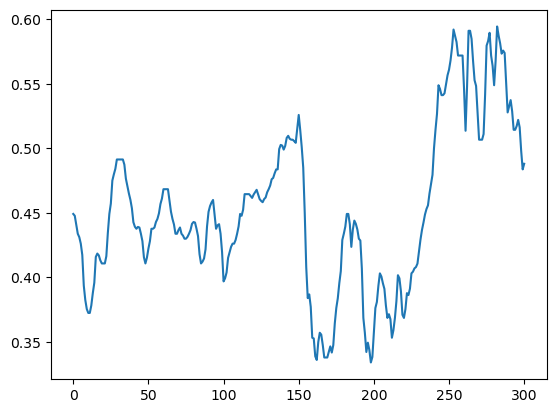

In [6]:
plt.plot(adl_x_train[0])

In [7]:
adl_x_train

array([[0.44911305, 0.44768491, 0.44097013, ..., 0.49805322, 0.48366406,
        0.48802365],
       [0.49518942, 0.49518942, 0.49518942, ..., 0.53392463, 0.53356635,
        0.52172279],
       [0.49248346, 0.45848366, 0.46234215, ..., 0.32794648, 0.32243436,
        0.32844758],
       ...,
       [0.63150932, 0.64173933, 0.64332782, ..., 0.67405793, 0.64297956,
        0.64517689],
       [0.26260273, 0.35412908, 0.35505612, ..., 0.34623672, 0.45104229,
        0.44978954],
       [0.31857587, 0.32403788, 0.32260974, ..., 0.30993185, 0.3059982 ,
        0.30514632]])

## Preparing Fall Datasets

In [8]:
# preparing x, y and z dataset

df1 = pd.read_csv(fall_dir[0], sep=" ", header=None)
df1_x = df1.loc[::3].values.copy()
df1_y = df1.loc[1::3].values.copy()
df1_z = df1.loc[2::3].values.copy()

fall_x_data = df1_x
fall_y_data = df1_y
fall_z_data = df1_z

for fallf in fall_dir:
    df = pd.read_csv(fallf, sep=" ", header=None)
    new_x = df.loc[::3].values.copy()
    new_y = df.loc[1::3].values.copy()
    new_z = df.loc[2::3].values.copy()
    fall_x_data = np.concatenate([fall_x_data, new_x])
    fall_y_data = np.concatenate([fall_y_data, new_y])
    fall_z_data = np.concatenate([fall_z_data, new_z])

In [9]:
# normalising dataset
min_x_fall = np.min(fall_x_data)
min_y_fall = np.min(fall_y_data)
min_z_fall = np.min(fall_z_data)

max_x_fall = np.max(fall_x_data)
max_y_fall = np.max(fall_y_data)
max_z_fall = np.max(fall_z_data)

normalised_fall_x_data = (fall_x_data - min_x_fall) / (max_x_fall - min_x_fall)
normalised_fall_y_data = (fall_y_data - min_y_fall) / (max_y_fall - min_y_fall)
normalised_fall_z_data = (fall_z_data - min_z_fall) / (max_z_fall - min_z_fall)

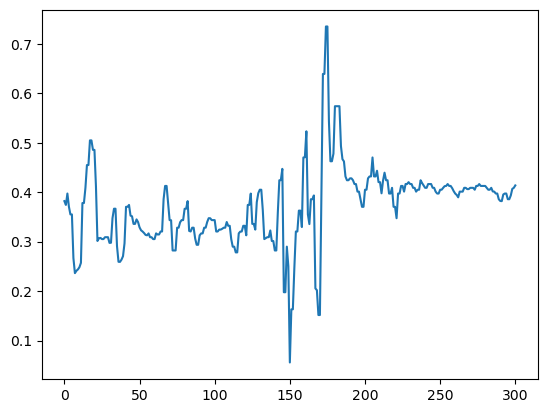

In [10]:
plt.plot(normalised_fall_x_data[0])

In [11]:
normalised_fall_x_data

array([[0.38194027, 0.37424835, 0.397274  , ..., 0.40674484, 0.40879936,
        0.41368511],
       [0.46647625, 0.43185007, 0.43185007, ..., 0.30897976, 0.32433854,
        0.32433854],
       [0.59115304, 0.629545  , 0.58731459, ..., 0.69398928, 0.68986019,
        0.68329325],
       ...,
       [0.61035027, 0.60622119, 0.60942574, ..., 0.28402485, 0.28287232,
        0.28019142],
       [0.56235719, 0.56235719, 0.54315995, ..., 0.5469984 , 0.49734416,
        0.48564342],
       [0.4356835 , 0.43588394, 0.44382642, ..., 0.59306975, 0.59306975,
        0.5929545 ]])

## Creating Autoencoder Models

In [243]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(150),
            layers.Dense(50)
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(150),
            layers.Dense(301, activation = 'sigmoid')
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = AnomalyDetector()
autoencoder.compile(optimizer = 'adam', loss = 'mae')

In [103]:
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(200, activation='relu')
        ])
        
        self.decoder = tf.keras.Sequential([
            layers.Dense(301, activation='sigmoid')
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
autoencoder = AnomalyDetector()

In [204]:
autoencoder.compile(optimizer = 'adam', loss = 'mae')

### x_axis

In [244]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
xhistory = autoencoder.fit(adl_x_train, adl_x_train,
                         epochs = 1000,
                         batch_size = 100,
                         validation_data = (adl_x_test, adl_x_test),
                         shuffle = True, callbacks = [early_stopping])

Epoch 1/1000
70/70 [==============================] - 1s 6ms/step - loss: 0.0992 - val_loss: 0.0642
Epoch 2/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.0683 - val_loss: 0.0562
Epoch 3/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.0605 - val_loss: 0.0522
Epoch 4/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.0484 - val_loss: 0.0441
Epoch 5/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.0443 - val_loss: 0.0458
Epoch 6/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.0383
Epoch 7/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0399
Epoch 8/1000
70/70 [==============================] - 0s 4ms/step - loss: 0.0373 - val_loss: 0.0377
Epoch 9/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.0354 - val_loss: 0.0349
Epoch 10/1000
70/70 [==============================] - 0s 3ms/step - loss: 0.0348 - val_loss: 0.0338

In [245]:
xpredicted = autoencoder.predict(adl_x_train)

219/219 [==============================] - 0s 1ms/step


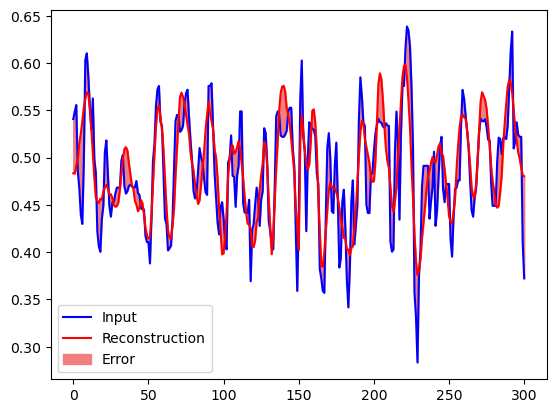

In [246]:
index = 100

plt.plot(adl_x_train[index], 'b')
plt.plot(xpredicted[index], 'r')
plt.fill_between(np.arange(301), xpredicted[index], adl_x_train[index], color='lightcoral')
plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
plt.show()

219/219 [==============================] - 0s 1ms/step


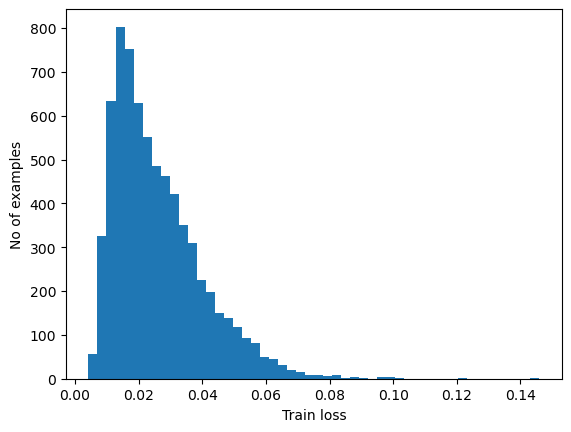

In [247]:
# Detect Anomalies: by calculating whether the reconstruction loss is greater than a fixed threshold
reconstructions = autoencoder.predict(adl_x_train)
train_loss = tf.keras.losses.mae(reconstructions, adl_x_train)

plt.hist(train_loss[None,:], bins = 50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [248]:
# choose a threshold value that is one sd above the mean (using adl)
adl_threshold = np.mean(train_loss) + 0.5*np.std(train_loss)
print("Threshold: ", adl_threshold)

Threshold:  0.03308916467367771


### Observe Fall Data for x axis

In [249]:
xpredict_fall = autoencoder.predict(normalised_fall_x_data)

18/18 [==============================] - 0s 1ms/step


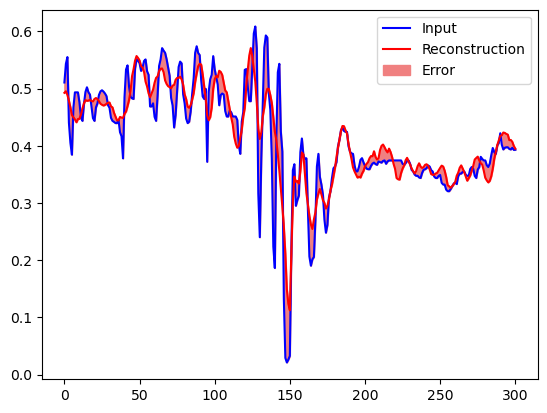

In [250]:
index = 100

plt.plot(normalised_fall_x_data[index], 'b')
plt.plot(xpredict_fall[index], 'r')
plt.fill_between(np.arange(301), xpredict_fall[index], normalised_fall_x_data[index], color='lightcoral')
plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
plt.show()

In [251]:
reconstructions = autoencoder.predict(normalised_fall_x_data)
test_loss = tf.keras.losses.mae(reconstructions, normalised_fall_x_data)

18/18 [==============================] - 0s 1ms/step


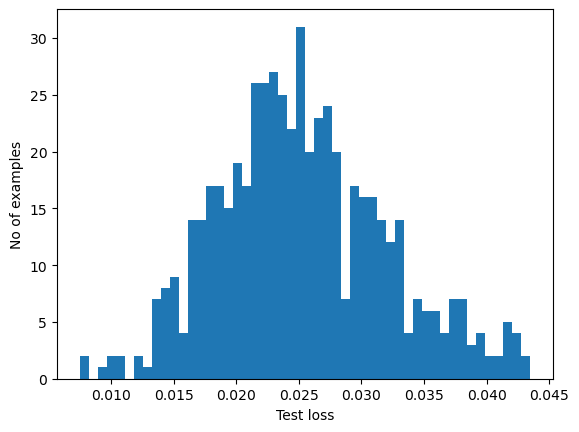

In [252]:
plt.hist(test_loss[None, :], bins = 50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

In [253]:
# choosing threshold using fall
fall_threshold = np.mean(test_loss) - np.std(test_loss)
print("Threshold: ", fall_threshold)

Threshold:  0.018526493813013883


### Evalutation

In [254]:
# using the threshold calculated, see how many will be classified wrongly

def compute_evaluation(train_loss, test_loss, threshold):
    test_total = len(test_loss)
    train_total = len(train_loss)
    print(f'Total Number of Training Data: {train_total}')
    print(f'Total Number of Testing Data: {test_total}')
    print()
    
    train_total = len(train_loss)
    test_total = len(test_loss)
    print('-----------------')
    print(f'Threshold: {round(threshold,3)}')
    print('-----------------')
    
    tp = np.count_nonzero(test_loss > threshold) # right side of fall
    fp = np.count_nonzero(train_loss > threshold) # right side of adl
    fn = np.count_nonzero(test_loss <= threshold) # left side of fall
    tn = np.count_nonzero(train_loss <= threshold) # left side of adl
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'False Negatives: {fn}')
    print(f'True Negatives: {tn}')
    print()
    
    acc = accuracy(tp, fp, fn, tn)
    prec = precision(tp, fp, fn, tn)
    rec = recall(tp, fp, fn, tn)
    f1_score = f1(tp, fp, fn, tn)
    f1_weighted = weighted_f1(tp, fp, fn, tn) # prioritising precision
    
    print('------------------')
    print('Evalutaion Metrics')
    print('------------------')
    print(f'Accuracy: {round(acc,3)}')
    print(f'Precision: {round(prec,3)}')
    print(f'Recall: {round(rec,3)}')
    print(f'F1 Score: {round(f1_score,3)}')
    print(f'Weighted F1 Score: {round(f1_weighted,3)}')    

def accuracy(tp, fp, fn, tn):
    try:
        return (tp+tn)/(tp+fp+fn+tn)
    except: return 0
    
def precision(tp, fp, fn, tn):
    try: 
        return tp/(tp+fp)
    except: return 0

def recall(tp, fp, fn, tn):
    try:
        return tp/(tp+fn)
    except: return 0

def f1(tp, fp, fn, tn):
    prec = precision(tp, fp, fn, tn)
    rec = recall(tp, fp, fn, tn)
    try:
        return 2*((prec*rec)/(prec+rec))
    except: return 0

def weighted_f1(tp, fp, fn, tn, beta=0.7):
    prec = precision(tp, fp, fn, tn)
    rec = recall(tp, fp, fn, tn)
    try:
        return (1+beta**2) * ((prec*rec)/(beta**2*prec+rec))
    except: return 0

def weighted_f1_v2(train_loss, test_loss, threshold):
    tp = np.count_nonzero(test_loss > threshold) # right side of fall
    fp = np.count_nonzero(train_loss > threshold) # right side of adl
    fn = np.count_nonzero(test_loss <= threshold) # left side of fall
    tn = np.count_nonzero(train_loss <= threshold) # left side of adl
    try:
        return weighted_f1(tp, fp, fn, tn)
    except: return 0

In [255]:
# Finding the best threshold
min_threshold = min(np.min(test_loss), np.min(train_loss))
max_threshold = max(np.max(test_loss), np.max(train_loss))
threshold_list = np.linspace(min_threshold, max_threshold, num = 100)
weighted_f1_score_list = [weighted_f1_v2(train_loss, test_loss, threshold) for threshold in threshold_list]

0.01856996867073151


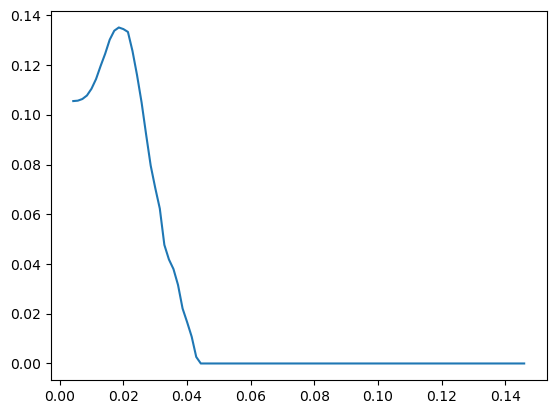

In [256]:
plt.plot(threshold_list, weighted_f1_score_list)
best_index = np.argmax(weighted_f1_score_list)
best_threshold = threshold_list[best_index]
print(best_threshold)

In [258]:
compute_evaluation(train_loss, test_loss, best_threshold)

Total Number of Training Data: 6996
Total Number of Testing Data: 554

-----------------
Threshold: 0.019
-----------------
True Positives: 466
False Positives: 4400
False Negatives: 88
True Negatives: 2596

------------------
Evalutaion Metrics
------------------
Accuracy: 0.406
Precision: 0.096
Recall: 0.841
F1 Score: 0.172
Weighted F1 Score: 0.135


### y_axis

In [213]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)
yhistory = autoencoder.fit(adl_y_train, adl_y_train,
                         epochs = 1000,
                         batch_size = 250,
                         validation_data = (adl_y_test, adl_y_test),
                         shuffle = True, callbacks = [early_stopping])

Epoch 1/1000
28/28 [==============================] - 0s 8ms/step - loss: 0.0376 - val_loss: 0.0394
Epoch 2/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0376 - val_loss: 0.0396
Epoch 3/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0375 - val_loss: 0.0396
Epoch 4/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0374 - val_loss: 0.0389
Epoch 5/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0371 - val_loss: 0.0392
Epoch 6/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0372 - val_loss: 0.0389
Epoch 7/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0371 - val_loss: 0.0396
Epoch 8/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0371 - val_loss: 0.0390
Epoch 9/1000
28/28 [==============================] - 0s 7ms/step - loss: 0.0368 - val_loss: 0.0391
Epoch 10/1000
28/28 [==============================] - 0s 6ms/step - loss: 0.0368 - val_loss: 0.0388

In [214]:
ypredicted = autoencoder.predict(adl_y_train)

219/219 [==============================] - 0s 2ms/step


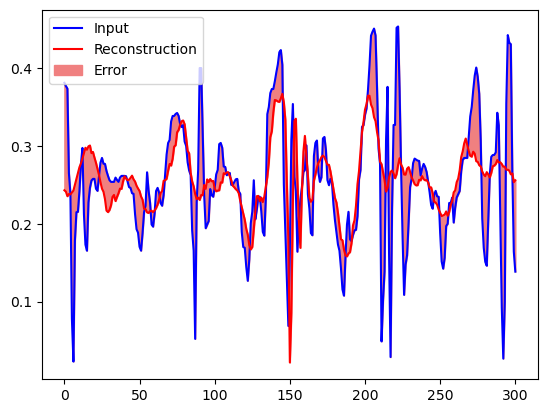

In [215]:
index = 100

plt.plot(adl_y_train[index], 'b')
plt.plot(ypredicted[index], 'r')
plt.fill_between(np.arange(301), ypredicted[index], adl_y_train[index], color='lightcoral')
plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
plt.show()

219/219 [==============================] - 0s 2ms/step


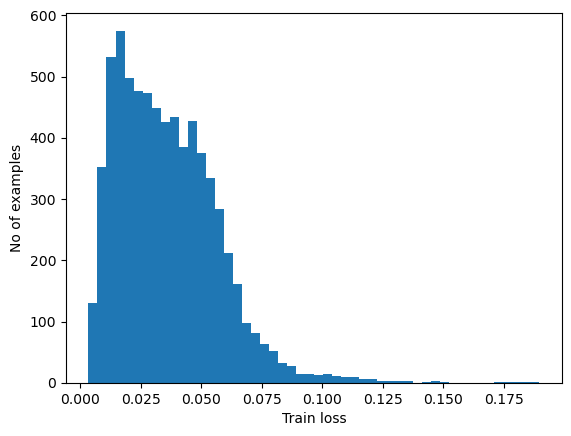

In [216]:
# Detect Anomalies: by calculating whether the reconstruction loss is greater than a fixed threshold
reconstructions = autoencoder.predict(adl_y_train)
train_loss = tf.keras.losses.mae(reconstructions, adl_y_train)

plt.hist(train_loss[None,:], bins = 50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [217]:
# choose a threshold value that is one sd above the mean
threshold = np.mean(train_loss) + 0.5*np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.04642338851484057


### Observe Fall Data for y axis

In [218]:
ypredict_fall = autoencoder.predict(normalised_fall_y_data)

18/18 [==============================] - 0s 1ms/step


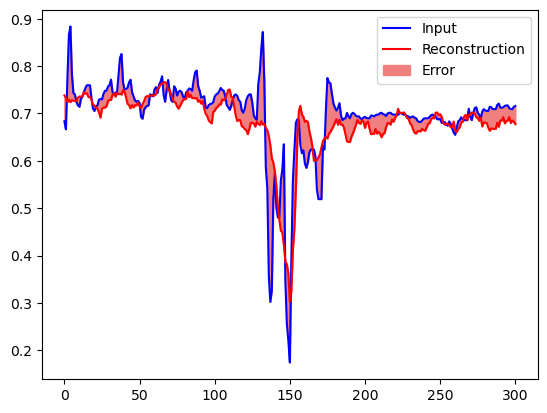

In [219]:
index = 100

plt.plot(normalised_fall_y_data[index], 'b')
plt.plot(ypredict_fall[index], 'r')
plt.fill_between(np.arange(301), ypredict_fall[index], normalised_fall_y_data[index], color='lightcoral')
plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
plt.show()

18/18 [==============================] - 0s 2ms/step


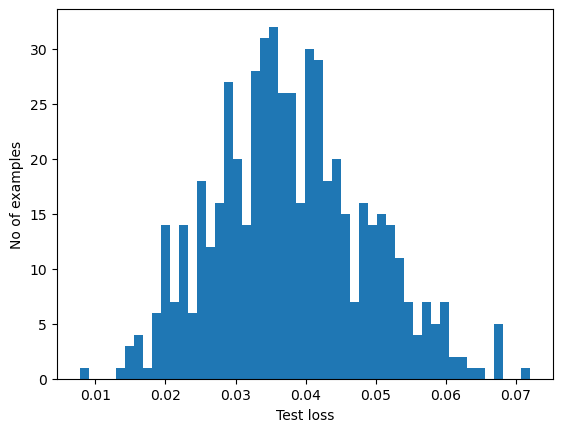

In [220]:
reconstructions = autoencoder.predict(normalised_fall_y_data)
test_loss = tf.keras.losses.mae(reconstructions, normalised_fall_y_data)

plt.hist(test_loss[None, :], bins = 50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

### Evaluation

In [225]:
# Finding the best threshold
min_threshold = min(np.min(test_loss), np.min(train_loss))
max_threshold = max(np.max(test_loss), np.max(train_loss))
threshold_list = np.linspace(min_threshold, max_threshold, num = 100)
weighted_f1_score_list = [weighted_f1_v2(train_loss, test_loss, threshold) for threshold in threshold_list]

0.027838023372309083


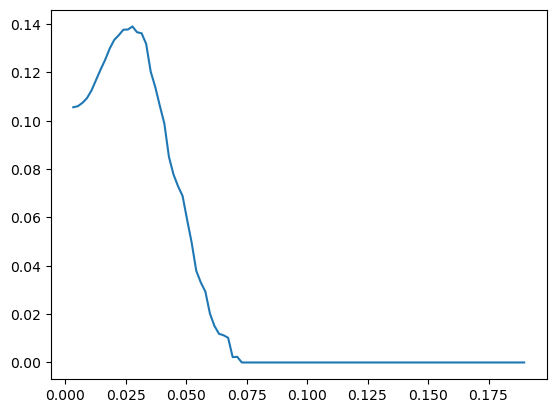

In [226]:
plt.plot(threshold_list, weighted_f1_score_list)
best_index = np.argmax(weighted_f1_score_list)
best_threshold = threshold_list[best_index]
print(best_threshold)

In [222]:
compute_evaluation(train_loss, test_loss, best_threshold)

Total Number of Training Data: 6996
Total Number of Testing Data: 554

-----------------
Threshold: 0.028
-----------------
True Positives: 455
False Positives: 4152
False Negatives: 99
True Negatives: 2844

------------------
Evalutaion Metrics
------------------
Accuracy: 0.437
Precision: 0.099
Recall: 0.821
F1 Score: 0.176
Weighted F1 Score: 0.139


### z_axis

In [ ]:
zhistory = autoencoder.fit(adl_z_train, adl_z_train,
                         epochs = 20,
                         batch_size = 512,
                         validation_data = (adl_z_test, adl_z_test),
                         shuffle = True)

In [ ]:
zpredicted = autoencoder.predict(adl_z_train)

In [ ]:
index = 100

plt.plot(adl_z_train[index], 'b')
plt.plot(zpredicted[index], 'r')
plt.fill_between(np.arange(301), zpredicted[index], adl_z_train[index], color='lightcoral')
plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
plt.show()

In [ ]:
# Detect Anomalies: by calculating whether the reconstruction loss is greater than a fixed threshold
reconstructions = autoencoder.predict(adl_z_train)
train_loss = tf.keras.losses.mae(reconstructions, adl_z_train)

plt.hist(train_loss[None,:], bins = 50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
# choose a threshold value that is one sd above the mean
threshold = np.mean(train_loss) + 0.5*np.std(train_loss)
print("Threshold: ", threshold)

### Observing Fall Data for z axis

In [ ]:
zpredict_fall = autoencoder.predict(normalised_fall_z_data)

In [ ]:
index = 100

plt.plot(normalised_fall_z_data[index], 'b')
plt.plot(zpredict_fall[index], 'r')
plt.fill_between(np.arange(301), zpredict_fall[index], normalised_fall_z_data[index], color='lightcoral')
plt.legend(labels = ['Input', 'Reconstruction', 'Error'])
plt.show()

In [ ]:
reconstructions = autoencoder.predict(normalised_fall_z_data)
test_loss = tf.keras.losses.mae(reconstructions, normalised_fall_z_data)

plt.hist(test_loss[None, :], bins = 50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()